###Đặng Quang Hưng - ITDSIU18035

#Question 1

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive')
!pwd

/content/gdrive/My Drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample

In [4]:
df = pd.read_csv('data.csv',  encoding= 'unicode_escape')
df.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom


In [5]:
df = df[df.Quantity > 0]

In [6]:
df['totalPerInvoice'] = df[['Quantity']].multiply(df["UnitPrice"], axis="index")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPerInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [7]:
df = df.loc[df['Country'] == 'United Kingdom']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,totalPerInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,214.80


In [8]:
df = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['totalPerInvoice'].sum()
df['totalPerInvoice']

0        77183.60
1          358.56
2          347.71
3          303.04
4          310.78
           ...   
16644      223.61
16645      208.00
16646      765.28
16647     1001.32
16648       70.68
Name: totalPerInvoice, Length: 16649, dtype: float64

In [10]:
boot_strap = []
boot_means = []
boot_stds = []
for _ in range(1000):
    boot_sample = resample(df['totalPerInvoice'], replace = True, n_samples = 1000)
    boot_strap.append(boot_sample) 
    boot_means.append(np.mean(boot_sample))
    boot_stds.append(np.std(boot_sample, ddof = 1))

In [11]:
boot_dict = {
    'sample': boot_strap,
    'mean': boot_means,
    'std': boot_stds
}

In [12]:
df_boot = pd.DataFrame(boot_dict)
df_boot

,sample,mean,std
0,4186 118.50 4060 131.41 16603 14...,514.796010,2590.848641
1,16074 320.30 16206 159.57 6991 328.5...,454.101600,766.480056
2,3766 466.18 1155 62.28 8389 110...,440.920870,1030.607032
3,5841 496.24 9723 1181.00 297 16...,422.592461,529.503360
4,1019 203.30 3952 728.04 12664 933.3...,459.959640,784.027333
...,...,...,...
995,6021 157.16 6405 248.17 763 721.9...,568.652341,5351.945073
996,16292 319.51 14328 395.00 1274 617.7...,435.119130,797.490052
997,13877 260.66 5253 174.40 6867 ...,495.757230,2532.254990
998,14686 1157.08 12272 1026.27 5612 61...,404.913630,669.592269


In [13]:
from scipy.stats import sem
sem(df_boot['mean'])

1.6478271971759333

In [14]:
df_boot.describe()

,mean,std
count,1000.000000,1000.000000
mean,439.592039,1183.631355
std,52.108871,1177.272630
min,352.120100,385.032304
25%,408.331173,637.501237
50%,426.803980,790.640337
75%,450.876117,1024.356717
max,753.092090,7549.030129


In [16]:
good_sample = df_boot[(abs( df_boot['mean'] -439.592039		) <= 2)  & (abs(df_boot['std'] - 1183.631355) <= 100)]
good_sample

,sample,mean,std
289,10452 925.16 13115 251.80 12527 277.4...,438.69479,1137.272985
464,14350 62.60 5330 269.70 4115 194.4...,441.07918,1144.090898
476,11501 164.80 14451 371.87 9174 447.6...,440.04677,1114.754851
481,10213 571.06 3336 156.10 3544 36...,440.33667,1132.552609
853,16035 703.37 13118 627.13 3039 306.7...,439.60239,1168.256522


In [19]:
pd.DataFrame(boot_strap[289])

,totalPerInvoice
10452,925.16
13115,251.80
12527,277.43
2279,630.46
15412,266.14
...,...
5099,889.46
14890,571.30
13006,63.95
15519,476.96


In [20]:
good_sample = boot_strap[289]
sample_mean = good_sample.mean()
sample_mean

438.6947899999998

In [22]:
sample_var = good_sample.var(ddof=1)
sample_var

1293389.8417997549

##The prior 1:

p1($\mu$) ~ N(450, 1500000) for the Total price



From the prior: $\mu$ = 450; $\sigma^{2}$=1500000

From the dataset: $\mu$ = 438.6947899999998; $\sigma^{2}$=1293389.8417997549, $n$=1000

*compute prior distribution*

In [23]:
import scipy.stats

wish_mean = 450 
wish_standard_deviation = np.sqrt(1500000)

x = good_sample.to_list()
print('the prior for the first sample : ')
scipy.stats.norm.pdf(x[0], wish_mean, wish_standard_deviation* 2)

the prior for the first sample : 


0.00015983183943804092

Text(0.5, 1.0, 'Informed prior for Python developers height')

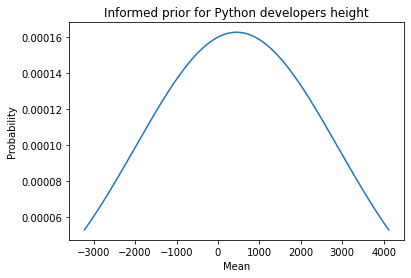

In [24]:
import numpy
import scipy.stats
from matplotlib import pyplot

wish_mean = 450 
wish_standard_deviation = np.sqrt(1500000)


sample = numpy.linspace(450 - 3*np.sqrt(1500000), 450 + 3*np.sqrt(1500000), 1000)
probability = scipy.stats.norm.pdf(sample, wish_mean, wish_standard_deviation* 2)


pyplot.plot(sample, probability)
pyplot.xlabel('Mean')
pyplot.ylabel('Probability')
pyplot.title('Informed prior for Python developers height')

*posterior probability of mean = 450*

In [25]:
import scipy.stats

x = good_sample.to_list()

wish_mean = 450 
wish_standard_deviation = np.sqrt(1500000)

prior = scipy.stats.norm.pdf(x[0], wish_mean, wish_standard_deviation* 2)

likelihoods = scipy.stats.norm.pdf(x, sample_mean, np.sqrt(sample_var))

posterior = prior * likelihoods[0]
print('construct posterior probability of mean = 450: ', posterior)
# print('{0:.30f}'.format(posterior))

construct posterior probability of mean = 450:  5.1165560599030576e-08


In [26]:
a = 1/1500000
b = 1000/sample_var
phi1 = 1/(a+b)
theta1 = (a*450+b*sample_mean)/(a+b)

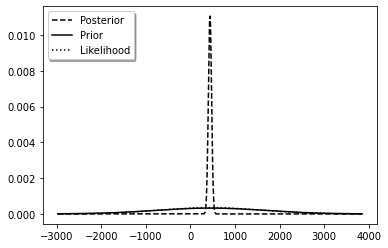

In [27]:
import matplotlib.pyplot as plt

sigma1 = np.sqrt(1500000)
x = numpy.linspace(sample_mean - 3*np.sqrt(sample_var), sample_mean + 3*np.sqrt(sample_var), 1000)

fig, ax = plt.subplots()
ax.plot(x, scipy.stats.norm.pdf(x, theta1, np.sqrt(phi1)), 'k--', label='Posterior')
ax.plot(x, scipy.stats.norm.pdf(x, 450, np.sqrt(1500000)), 'k', label='Prior')
ax.plot(x, scipy.stats.norm.pdf(x, sample_mean, np.sqrt(sample_var)), 'k:', label='Likelihood')

legend = ax.legend(loc='upper left', shadow=True)
plt.show()

##Prior 2:

p2($\mu$) ~ N(500, 1600000) for the Total price



From the prior: $\mu$ = 500; $\sigma^{2}$=1600000

From the dataset: $\mu$ = 438.6947899999998; $\sigma^{2}$=1293389.8417997549, $n$=1000

*compute prior distribution*

In [31]:
import scipy.stats

wish_mean = 500 
wish_standard_deviation = np.sqrt(1600000)

x = good_sample.to_list()

print('the prior for the first sample: ')
scipy.stats.norm.pdf(x[0], wish_mean, wish_standard_deviation* 2)

the prior for the first sample: 


0.00015548446070521294

Text(0.5, 1.0, 'Informed prior for sample')

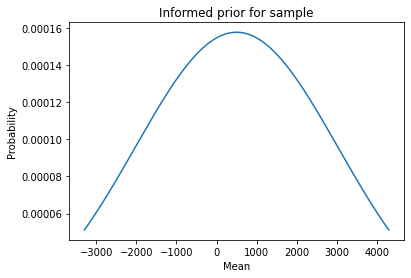

In [32]:
import numpy
import scipy.stats
from matplotlib import pyplot

wish_mean = 500 
wish_standard_deviation = np.sqrt(1600000)


sample = numpy.linspace(500 - 3*np.sqrt(1600000), 500 + 3*np.sqrt(1600000), 1000)

probability = scipy.stats.norm.pdf(sample, wish_mean, wish_standard_deviation* 2)

pyplot.plot(sample, probability)
pyplot.xlabel('Mean')
pyplot.ylabel('Probability')
pyplot.title('Informed prior for sample')

*posterior probability of mean = 500*

In [33]:
import scipy.stats

x = good_sample.to_list()

wish_mean = 500 
wish_standard_deviation = np.sqrt(1600000)


prior = scipy.stats.norm.pdf(x[0], wish_mean, wish_standard_deviation* 2)

likelihoods = scipy.stats.norm.pdf(x, sample_mean, np.sqrt(sample_var))

posterior = prior * likelihoods[0]
print('posterior probability of mean = 500: ',posterior)

posterior probability of mean = 500:  4.9773872492433554e-08


In [34]:
a = 1/1600000
b = 1000/sample_var
phi1 = 1/(a+b)
theta1 = (a*500+b*sample_mean)/(a+b)

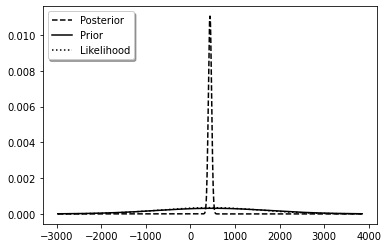

In [35]:
import matplotlib.pyplot as plt

sigma1 = np.sqrt(1600000)
x = numpy.linspace(sample_mean - 3*np.sqrt(sample_var), sample_mean + 3*np.sqrt(sample_var), 1000 )

fig, ax = plt.subplots()
ax.plot(x, scipy.stats.norm.pdf(x, theta1, np.sqrt(phi1)), 'k--', label='Posterior')
ax.plot(x, scipy.stats.norm.pdf(x, 500, np.sqrt(1600000)), 'k', label='Prior')
ax.plot(x, scipy.stats.norm.pdf(x, sample_mean, np.sqrt(sample_var)), 'k:', label='Likelihood')
legend = ax.legend(loc='upper left', shadow=True)
plt.show()

# Question 2

In [39]:
data = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
data = data.dropna(axis = 0)
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [40]:
data = data[data['Country'] == 'United Kingdom (Europe)']
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
548402,1743-11-01,7.176,1.848,United Kingdom (Europe)
548407,1744-04-01,7.536,2.578,United Kingdom (Europe)
548408,1744-05-01,9.697,1.573,United Kingdom (Europe)
548409,1744-06-01,12.962,1.688,United Kingdom (Europe)
548410,1744-07-01,14.204,1.708,United Kingdom (Europe)
...,...,...,...,...
551635,2013-04-01,6.635,0.332,United Kingdom (Europe)
551636,2013-05-01,9.826,0.304,United Kingdom (Europe)
551637,2013-06-01,13.285,0.338,United Kingdom (Europe)
551638,2013-07-01,17.011,0.326,United Kingdom (Europe)


In [41]:
boot_strap = []
boot_means = []
boot_stds = []
for _ in range(1000):
    boot_sample = resample(data['AverageTemperature'], replace = True, n_samples = 1000)
    boot_strap.append(boot_sample) 
    boot_means.append(np.mean(boot_sample))
    boot_stds.append(np.std(boot_sample, ddof = 1))

In [42]:
boot_dict = {
    'sample': boot_strap,
    'mean': boot_means,
    'std': boot_stds
}

In [43]:
df_boot = pd.DataFrame(boot_dict)
df_boot

,sample,mean,std
0,551018 5.844 551220 13.055 550159 6...,8.803982,4.441869
1,550929 12.534 548845 8.729 549522 1...,8.599238,4.434118
2,548714 5.500 551082 6.444 549623 13...,8.689969,4.409148
3,549112 1.447 550935 6.120 550827 5...,8.579478,4.414210
4,549608 10.101 551547 4.868 550246 15...,8.804337,4.353988
...,...,...,...
995,549408 12.744 548609 5.232 551041 10...,8.602175,4.495572
996,550132 3.314 551134 15.540 550956 13...,8.673366,4.363743
997,548973 13.244 549371 14.691 549996 11...,8.679872,4.389578
998,549506 6.200 549722 5.559 551495 15...,8.624064,4.438059


In [44]:
from scipy.stats import sem
sem(df_boot['mean'])

0.004256192911888251

In [45]:
df_boot.describe()

,mean,std
count,1000.000000,1000.000000
mean,8.658003,4.400777
std,0.134593,0.059419
min,8.189668,4.192287
25%,8.568797,4.359363
50%,8.661899,4.400936
75%,8.743644,4.439560
max,9.127041,4.570833


In [46]:
good_sample = df_boot[(abs( df_boot['mean'] - 8.654510	) <= 0.005)  & (abs(df_boot['std'] - 4.400777) <= 20)]
good_sample

,sample,mean,std
119,548965 9.350 550452 12.654 549710 7...,8.655366,4.405195
176,550856 10.381 548589 13.903 551558 7...,8.654699,4.471807
198,550103 12.872 550787 15.213 550080 12...,8.653209,4.386355
212,549925 8.856 549651 4.302 548526 2...,8.658220,4.330732
254,551280 12.633 550922 8.039 550903 8...,8.658486,4.385684
311,550083 4.296 549478 14.775 549573 11...,8.654818,4.501231
331,549076 2.445 551071 6.212 550033 8...,8.656938,4.351794
352,549242 4.412 549001 10.812 550526 7...,8.655482,4.316385
371,549919 8.239 548718 2.280 550210 14...,8.649832,4.409964
377,551057 3.362 549862 15.472 549887 14...,8.656676,4.369189


In [47]:
pd.DataFrame(boot_strap[818])

,AverageTemperature
551037,13.592
551209,11.023
551382,6.684
548944,1.788
550671,5.379
...,...
549705,12.713
548402,7.176
549385,9.824
548859,5.075


In [49]:
good_sample = boot_strap[818]
sample_mean = good_sample.mean()
sample_mean

8.651624000000002

In [50]:
sample_var = good_sample.var(ddof = 1)
sample_var

19.53253313976378

##Prior 1:


p1($\mu$) ~ N(10, 16) for the Average Temperature



From the prior: $\mu$ = 10; $\sigma^{2}$=16

From the dataset: $\mu$ = 8.651624000000002; $\sigma^{2}$=19.53253313976378, $n$=1000

In [51]:
import scipy.stats

wish_mean = 10 
wish_standard_deviation = 4

x = good_sample.to_list()
print('the prior for the first sample : ')
scipy.stats.norm.pdf(x[0], wish_mean, wish_standard_deviation* 2)

the prior for the first sample : 


0.04508613196987673

Text(0.5, 1.0, 'Informed prior for sample')

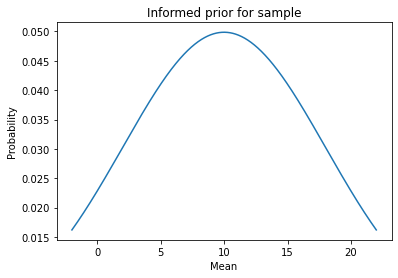

In [53]:
import numpy
import scipy.stats
from matplotlib import pyplot

wish_mean = 10 
wish_standard_deviation = np.sqrt(16)


sample = numpy.linspace(10 - 3*np.sqrt(16), 10 + 3*np.sqrt(16), 1000)

probability = scipy.stats.norm.pdf(sample, wish_mean, wish_standard_deviation* 2)

pyplot.plot(sample, probability)
pyplot.xlabel('Mean')
pyplot.ylabel('Probability')
pyplot.title('Informed prior for sample')

In [54]:
import scipy.stats

x = good_sample.to_list()

wish_mean = 10
wish_standard_deviation = 4


prior = scipy.stats.norm.pdf(x[0], wish_mean, wish_standard_deviation* 2)

likelihoods = scipy.stats.norm.pdf(x, sample_mean, np.sqrt(sample_var))

posterior = prior * likelihoods[0]

print('posterior probability of for the mean: ', posterior)

posterior probability of for the mean:  0.0021788761841168725


In [55]:
a = 1/16
b = 1000/sample_var
phi1 = 1/(a+b)
theta1 = (a*10+b*sample_mean)/(a+b)

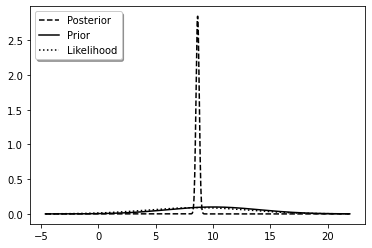

In [56]:
import matplotlib.pyplot as plt

sigma1 = np.sqrt(16)
x = numpy.linspace(sample_mean - 3*np.sqrt(sample_var), sample_mean + 3*np.sqrt(sample_var), 1000)

fig, ax = plt.subplots()
ax.plot(x, scipy.stats.norm.pdf(x, theta1, np.sqrt(phi1)), 'k--', label='Posterior')
ax.plot(x, scipy.stats.norm.pdf(x, 10, np.sqrt(16)), 'k', label='Prior')
ax.plot(x, scipy.stats.norm.pdf(x, sample_mean, np.sqrt(sample_var)), 'k:', label='Likelihood')

legend = ax.legend(loc='upper left', shadow=True)
plt.show()

##Prior 2:

p1($\mu$) ~ N(11, 17) for the Average Temperature



From the prior: $\mu$ = 11; $\sigma^{2}$=17

From the dataset: $\mu$ = 8.651624000000002; $\sigma^{2}$=19.53253313976378, $n$=1000

In [57]:
import scipy.stats

wish_mean = 11 
wish_standard_deviation = np.sqrt(17)

x = good_sample.to_list()
print('the prior for the first item : ')
scipy.stats.norm.pdf(x[0], wish_mean, wish_standard_deviation* 2)

the prior for the first item : 


0.0460469911866877

Text(0.5, 1.0, 'Informed prior for sample')

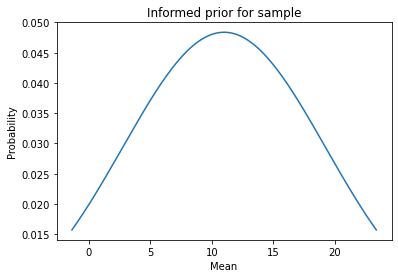

In [58]:
import numpy
import scipy.stats
from matplotlib import pyplot

wish_mean = 11
wish_standard_deviation = np.sqrt(17)


sample = numpy.linspace(11 - 3*np.sqrt(17), 11 + 3*np.sqrt(17), 1000)

probability = scipy.stats.norm.pdf(sample, wish_mean, wish_standard_deviation* 2)

pyplot.plot(sample, probability)
pyplot.xlabel('Mean')
pyplot.ylabel('Probability')
pyplot.title('Informed prior for sample')

In [59]:
import scipy.stats

x = good_sample.to_list()

wish_mean = 11
wish_standard_deviation = np.sqrt(17)

prior = scipy.stats.norm.pdf(x[0], wish_mean, wish_standard_deviation* 2)

likelihoods = scipy.stats.norm.pdf(x, sample_mean, np.sqrt(sample_var))

posterior = prior * likelihoods[0]
print('posterior probability of for the mean: ',posterior)

posterior probability of for the mean:  0.0022253115994502926


In [ ]:
a = 1/17
b = 1000/sample_var
phi1 = 1/(a+b)
theta1 = (a*11+b*sample_mean)/(a+b)

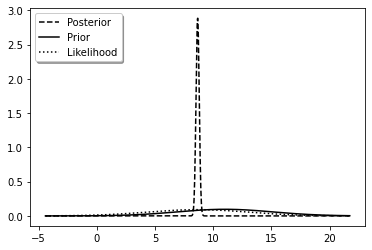

In [ ]:
import matplotlib.pyplot as plt

sigma1 = np.sqrt(17)
x = numpy.linspace(sample_mean - 3*np.sqrt(sample_var), sample_mean + 3*np.sqrt(sample_var), 1000)

fig, ax = plt.subplots()
ax.plot(x, scipy.stats.norm.pdf(x, theta1, np.sqrt(phi1)), 'k--', label='Posterior')
ax.plot(x, scipy.stats.norm.pdf(x, 11, np.sqrt(17)), 'k', label='Prior')
ax.plot(x, scipy.stats.norm.pdf(x, sample_mean, np.sqrt(sample_var)), 'k:', label='Likelihood')

legend = ax.legend(loc='upper left', shadow=True)
plt.show()